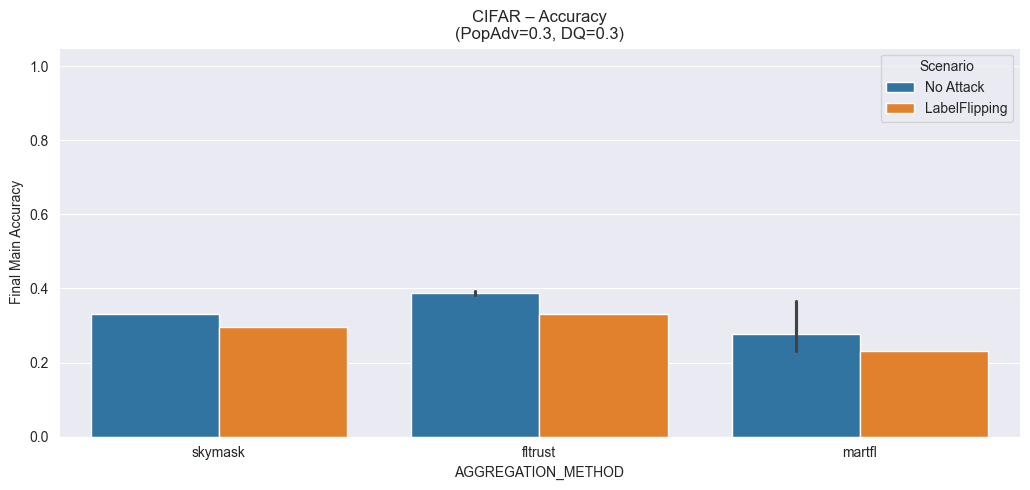

saved results\paper_figures\label_flipping_robustness_csv\acc_CIFAR_LabelFlipping.pdf


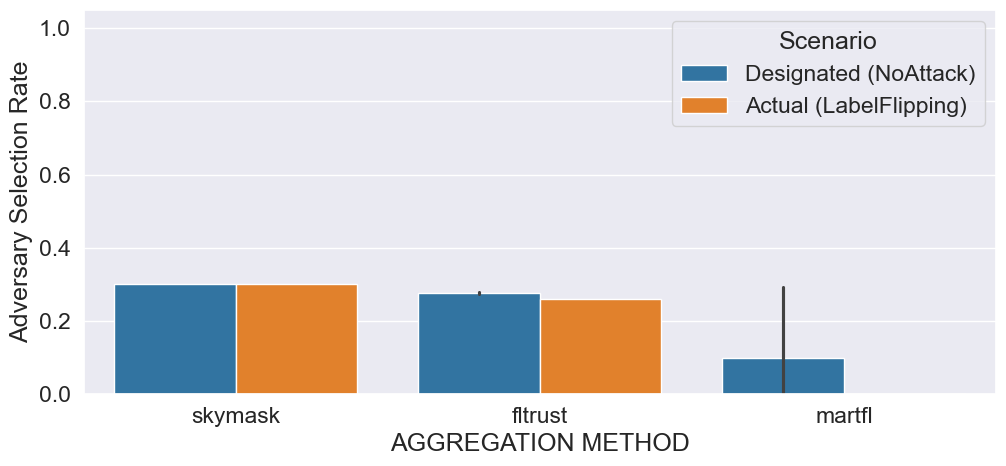

saved results\paper_figures\label_flipping_robustness_csv\sel_CIFAR_LabelFlipping.pdf


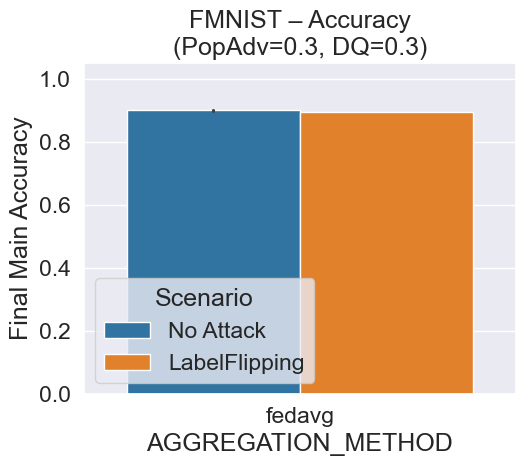

saved results\paper_figures\label_flipping_robustness_csv\acc_FMNIST_LabelFlipping.pdf


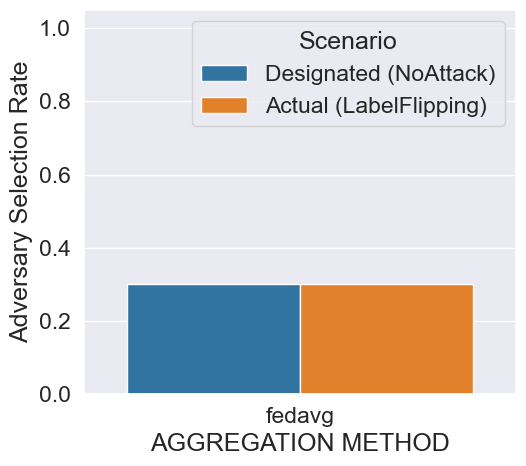

saved results\paper_figures\label_flipping_robustness_csv\sel_FMNIST_LabelFlipping.pdf
[skip] AG_NEWS: missing rows for attack=LabelFlipping
[skip] TREC: missing rows for attack=LabelFlipping


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------------------
# CONFIG – tweak as needed or turn them into CLI args
# ---------------------------------------------------------------------
CSV_PATH              = Path("../result_new/summary_avg.csv")   # your upload
FIXED_POP_ADV_RATE    = 0.3       # pair on this population rate
DISCOVERY_QUALITY     = 0.3
BUYER_MODE            = "unbiased"
SAVE_DIR              = Path("./results/paper_figures/label_flipping_robustness_csv")
SAVE_DIR.mkdir(parents=True, exist_ok=True)
# ---------------------------------------------------------------------

ATTACK_LABELS = {
    "label_flip":  "LabelFlipping",
    "backdoor":    "Backdoor",
    None:          "NoAttack",
    "":            "NoAttack"
}

def load_and_tag(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)

    # Tag rows with an EFFECTIVE_ATTACK column
    df["EFFECTIVE_ATTACK"] = (
        df["attack_objective"]
        .map(lambda x: ATTACK_LABELS.get(str(x).strip().lower(), "UnknownAttack"))
    )

    # Derive No‑Attack rows when adv rate is 0
    df.loc[df["ADV_RATE"].eq(0), "EFFECTIVE_ATTACK"] = "NoAttack"

    # Keep separate columns for clarity
    df = df.rename(columns={"ADV_RATE": "ADV_RATE_effective"})
    df["ADV_RATE_population"] = df["ADV_RATE_effective"].where(
        df["EFFECTIVE_ATTACK"] != "NoAttack", FIXED_POP_ADV_RATE
    )
    return df

def make_barplots(df: pd.DataFrame, dataset: str, attack: str) -> None:
    """
    Produces two bar charts (accuracy & selection rate) for one dataset + attack.
    Saves them as PDF in SAVE_DIR and shows them inline.
    """
    base = df.query(
        "DATASET == @dataset and "
        "discovery_quality == @DISCOVERY_QUALITY and "
        "buyer_data_mode == @BUYER_MODE and "
        "ADV_RATE_population == @FIXED_POP_ADV_RATE"
    )

    df_attack  = base.query("EFFECTIVE_ATTACK == @attack").copy()
    df_no_atk  = base.query("EFFECTIVE_ATTACK == 'NoAttack'").copy()

    if df_attack.empty or df_no_atk.empty:
        print(f"[skip] {dataset}: missing rows for attack={attack}")
        return

    paired = pd.merge(
        df_attack[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   "AVG_ADVERSARY_SELECTION_RATE"]],
        df_no_atk[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}"]],
        on="AGGREGATION_METHOD",
        suffixes=("_attack", "_baseline")
    )

    # ---------- Accuracy ----------
    acc_long = paired.melt(id_vars="AGGREGATION_METHOD",
                           value_vars=["FINAL_MAIN_ACC_baseline",
                                       "FINAL_MAIN_ACC_attack"],
                           var_name="Scenario", value_name="Accuracy")
    acc_long["Scenario"] = acc_long["Scenario"].map({
        "FINAL_MAIN_ACC_baseline": "No Attack",
        "FINAL_MAIN_ACC_attack":   attack
    })

    plt.figure(figsize=(2 + 1.2*len(paired), 5))
    sns.barplot(data=acc_long,
                x="AGGREGATION_METHOD", y="Accuracy", hue="Scenario",
                order=paired["AGGREGATION_METHOD"])
    plt.ylim(0, 1.05); plt.ylabel("Final Main Accuracy")
    plt.title(f"{dataset} – Accuracy\n(PopAdv={FIXED_POP_ADV_RATE}, DQ={DISCOVERY_QUALITY})")
    plt.tight_layout()
    fname = SAVE_DIR / f"acc_{dataset}_{attack}.pdf"
    plt.savefig(fname); plt.show()
    print("saved", fname)

    # ---------- Selection rate ----------
    sel_long = paired.melt(id_vars="AGGREGATION_METHOD",
                           value_vars=[f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}",
                                       "AVG_ADVERSARY_SELECTION_RATE"],
                           var_name="Scenario", value_name="SelRate")
    sel_long["Scenario"] = sel_long["Scenario"].map({
        f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}": "Designated (NoAttack)",
        "AVG_ADVERSARY_SELECTION_RATE": f"Actual ({attack})"
    })

    plt.figure(figsize=(2 + 1.2*len(paired), 5))
    sns.set_context("notebook", font_scale=1.5)
    sns.barplot(data=sel_long,
                x="AGGREGATION_METHOD", y="SelRate", hue="Scenario",
                order=paired["AGGREGATION_METHOD"])
    plt.xlabel("AGGREGATION METHOD", fontsize=18)

    plt.ylim(0, 1.05); plt.ylabel("Adversary Selection Rate")
    # plt.title(f"{dataset} – Selection Rate\n(PopAdv={FIXED_POP_ADV_RATE}, DQ={DISCOVERY_QUALITY})")
    plt.tight_layout()
    fname = SAVE_DIR / f"sel_{dataset}_{attack}.pdf"
    plt.savefig(fname); plt.show()
    print("saved", fname)

# ---------------------------------------------------------------------
if __name__ == "__main__":
    df = load_and_tag(CSV_PATH)

    for ds in df["DATASET"].unique():
        for atk in ["LabelFlipping"]:     # add "Backdoor" if needed
            make_barplots(df, ds, atk)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------------------
# CONFIG – tweak as needed or turn them into CLI args
# ---------------------------------------------------------------------
CSV_PATH              = Path("../result_new/summary_avg.csv")   # your upload
FIXED_POP_ADV_RATE    = 0.3       # pair on this population rate
DISCOVERY_QUALITY     = 0.3
BUYER_MODE            = "unbiased"
SAVE_DIR              = Path("./results/paper_figures/label_flipping_robustness_csv")
SAVE_DIR.mkdir(parents=True, exist_ok=True)
# ---------------------------------------------------------------------

ATTACK_LABELS = {
    "label_flip":  "LabelFlipping",
    "backdoor":    "Backdoor",
    None:          "NoAttack",
    "":            "NoAttack"
}

def load_and_tag(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)

    # Tag rows with an EFFECTIVE_ATTACK column
    df["EFFECTIVE_ATTACK"] = (
        df["attack_objective"]
        .map(lambda x: ATTACK_LABELS.get(str(x).strip().lower(), "UnknownAttack"))
    )

    # Derive No‑Attack rows when adv rate is 0
    df.loc[df["ADV_RATE"].eq(0), "EFFECTIVE_ATTACK"] = "NoAttack"

    # Keep separate columns for clarity
    df = df.rename(columns={"ADV_RATE": "ADV_RATE_effective"})
    df["ADV_RATE_population"] = df["ADV_RATE_effective"].where(
        df["EFFECTIVE_ATTACK"] != "NoAttack", FIXED_POP_ADV_RATE
    )
    return df

def make_barplots(df: pd.DataFrame, dataset: str, attack: str) -> None:
    """
    Produces two bar charts (accuracy & selection rate) for one dataset + attack.
    Saves them as PDF in SAVE_DIR and shows them inline.
    """
    base = df.query(
        "DATASET == @dataset and "
        "discovery_quality == @DISCOVERY_QUALITY and "
        "buyer_data_mode == @BUYER_MODE and "
        "ADV_RATE_population == @FIXED_POP_ADV_RATE"
    )

    df_attack  = base.query("EFFECTIVE_ATTACK == @attack").copy()
    df_no_atk  = base.query("EFFECTIVE_ATTACK == 'NoAttack'").copy()

    if df_attack.empty or df_no_atk.empty:
        print(f"[skip] {dataset}: missing rows for attack={attack}")
        return
    print(df_attack[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   "AVG_ADVERSARY_SELECTION_RATE"]])
    print(df_no_atk[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}"]])

    paired = pd.merge(
        df_attack[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   "AVG_ADVERSARY_SELECTION_RATE"]],
        df_no_atk[["AGGREGATION_METHOD", "FINAL_MAIN_ACC",
                   f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}"]],
        on="AGGREGATION_METHOD",
        suffixes=("_attack", "_baseline")
    )

    # ---------- Accuracy ----------
    acc_long = paired.melt(id_vars="AGGREGATION_METHOD",
                           value_vars=["FINAL_MAIN_ACC_baseline",
                                       "FINAL_MAIN_ACC_attack"],
                           var_name="Scenario", value_name="Accuracy")
    acc_long["Scenario"] = acc_long["Scenario"].map({
        "FINAL_MAIN_ACC_baseline": "No Attack",
        "FINAL_MAIN_ACC_attack":   attack
    })

    plt.figure(figsize=(2 + 1.2*len(paired), 5))
    sns.barplot(data=acc_long,
                x="AGGREGATION_METHOD", y="Accuracy", hue="Scenario",
                order=paired["AGGREGATION_METHOD"])
    plt.ylim(0, 1.05); plt.ylabel("Final Main Accuracy")
    plt.title(f"{dataset} – Accuracy\n(PopAdv={FIXED_POP_ADV_RATE}, DQ={DISCOVERY_QUALITY})")
    plt.tight_layout()
    fname = SAVE_DIR / f"acc_{dataset}_{attack}.pdf"
    plt.savefig(fname); plt.show()
    print("saved", fname)

    # ---------- Selection rate ----------
    sel_long = paired.melt(id_vars="AGGREGATION_METHOD",
                           value_vars=[f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}",
                                       "AVG_ADVERSARY_SELECTION_RATE"],
                           var_name="Scenario", value_name="SelRate")
    sel_long["Scenario"] = sel_long["Scenario"].map({
        f"NO_ATTACK_DESIG_MAL_SEL_RATE_{FIXED_POP_ADV_RATE:.1f}": "Designated (NoAttack)",
        "AVG_ADVERSARY_SELECTION_RATE": f"Actual ({attack})"
    })

    plt.figure(figsize=(2 + 1.2*len(paired), 5))
    sns.barplot(data=sel_long,
                x="AGGREGATION_METHOD", y="SelRate", hue="Scenario",
                order=paired["AGGREGATION_METHOD"])
    plt.ylim(0, 1.05); plt.ylabel("Adversary Selection Rate")
    plt.title(f"{dataset} – Selection Rate\n(PopAdv={FIXED_POP_ADV_RATE}, DQ={DISCOVERY_QUALITY})")
    plt.tight_layout()
    fname = SAVE_DIR / f"sel_{dataset}_{attack}.pdf"
    plt.savefig(fname); plt.show()
    print("saved", fname)
    plt.show()
    


   AGGREGATION_METHOD  FINAL_MAIN_ACC  AVG_ADVERSARY_SELECTION_RATE
39             fedavg        0.295733                      0.300000
41            fltrust        0.315467                      0.006000
42            skymask        0.342667                      0.300000
46             martfl        0.372350                      0.462187
50            skymask        0.299200                      0.300000
51             martfl        0.231167                      0.001667
52            fltrust        0.347267                      0.275749
   AGGREGATION_METHOD  FINAL_MAIN_ACC  NO_ATTACK_DESIG_MAL_SEL_RATE_0.3
0              fedavg        0.330433                          0.300000
8             skymask        0.330000                          0.300000
9              martfl        0.231567                          0.001667
10             martfl        0.231567                          0.001667
13             fedavg        0.326033                          0.300000
15             fedavg   

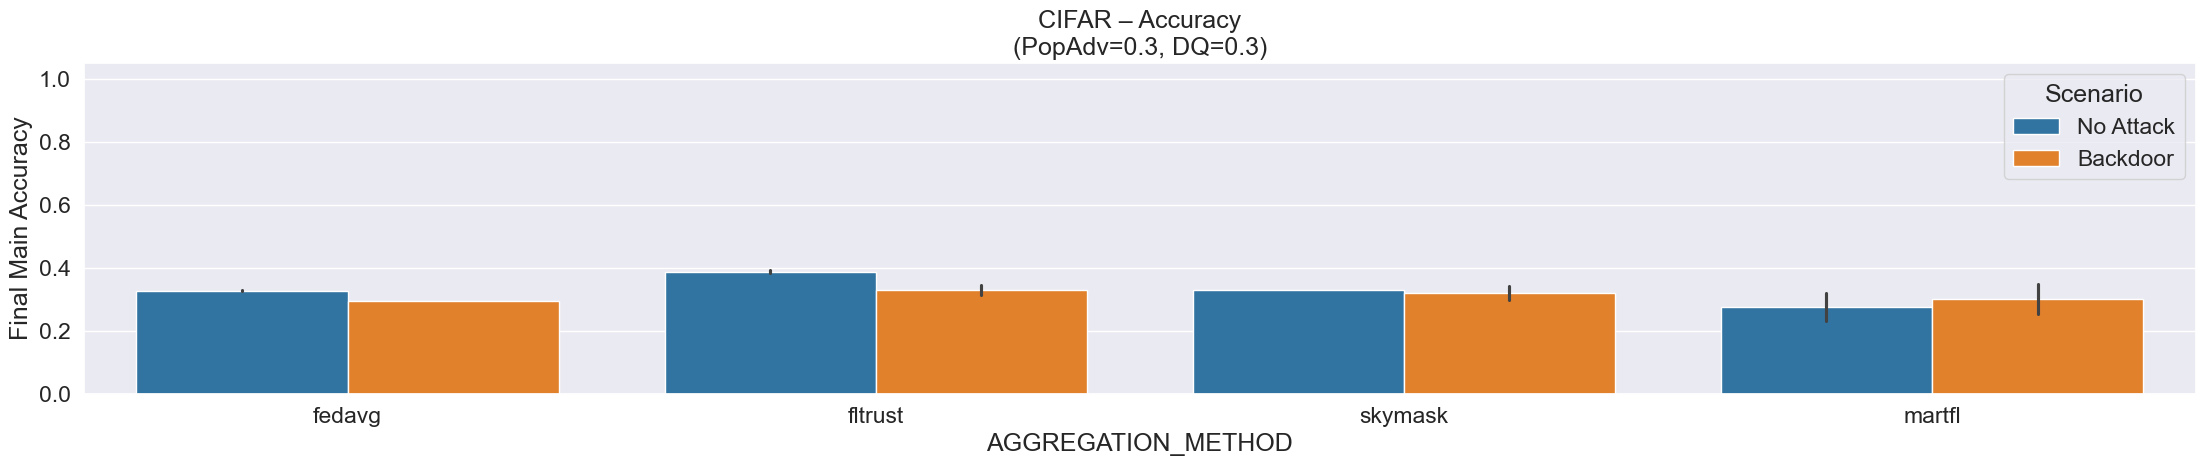

saved results\paper_figures\label_flipping_robustness_csv\acc_CIFAR_Backdoor.pdf


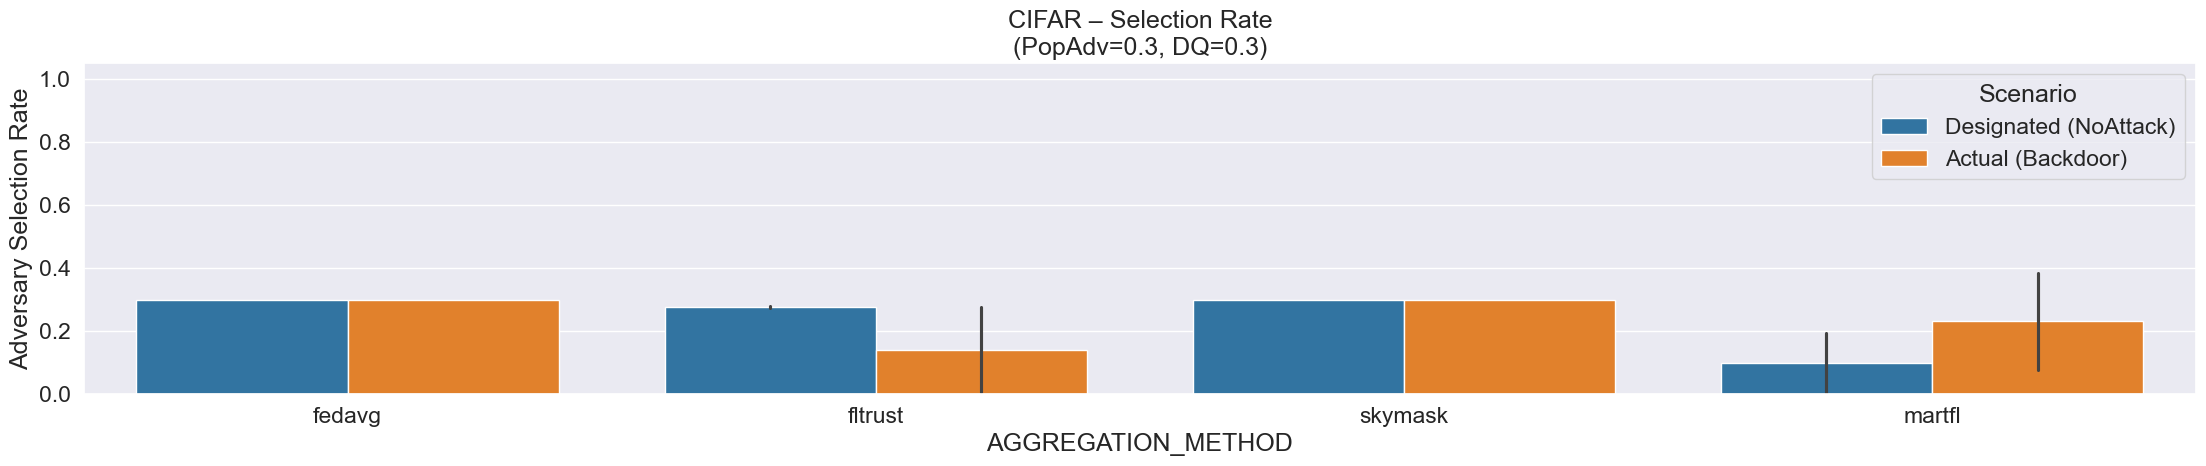

saved results\paper_figures\label_flipping_robustness_csv\sel_CIFAR_Backdoor.pdf
   AGGREGATION_METHOD  FINAL_MAIN_ACC  AVG_ADVERSARY_SELECTION_RATE
40            skymask        0.890000                      0.300000
43             martfl        0.895650                      0.111482
45             martfl        0.896833                      0.138831
47            fltrust        0.793667                      0.295046
49            skymask        0.899267                      0.300000
   AGGREGATION_METHOD  FINAL_MAIN_ACC  NO_ATTACK_DESIG_MAL_SEL_RATE_0.3
1              fedavg        0.900350                          0.300000
11            skymask        0.900000                          0.300000
12             fedavg        0.899467                          0.300000
14            fltrust        0.795733                          0.300000
16             martfl        0.850333                          0.332782
18             martfl        0.850333                          0.332782
19     

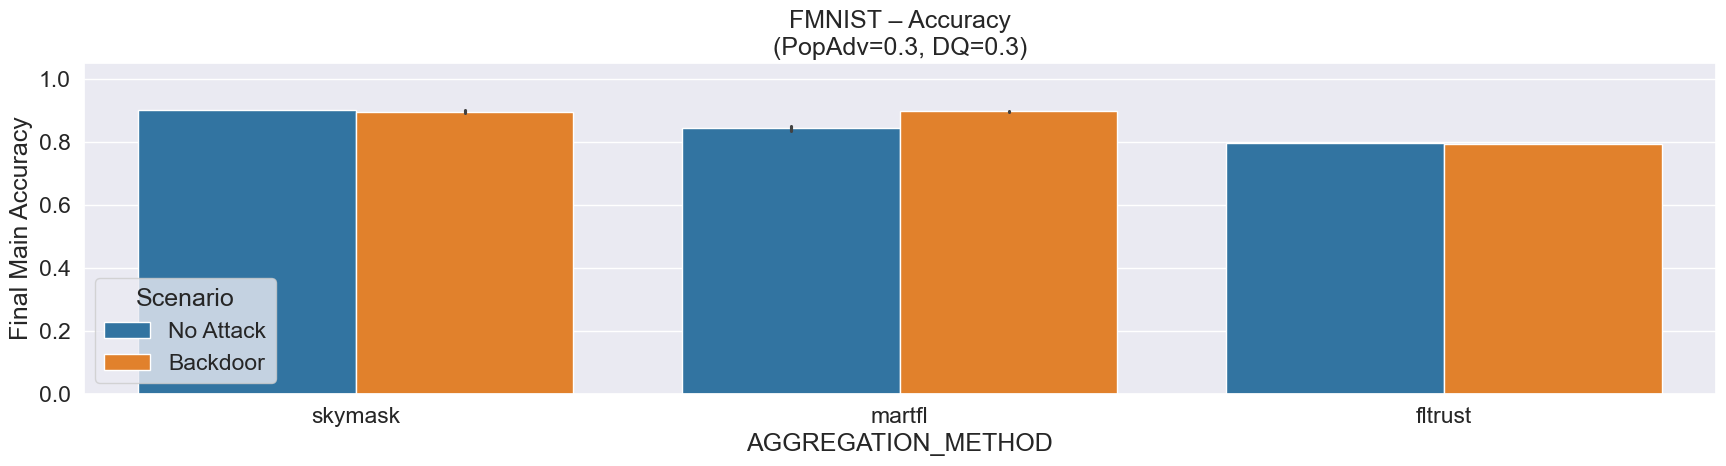

saved results\paper_figures\label_flipping_robustness_csv\acc_FMNIST_Backdoor.pdf


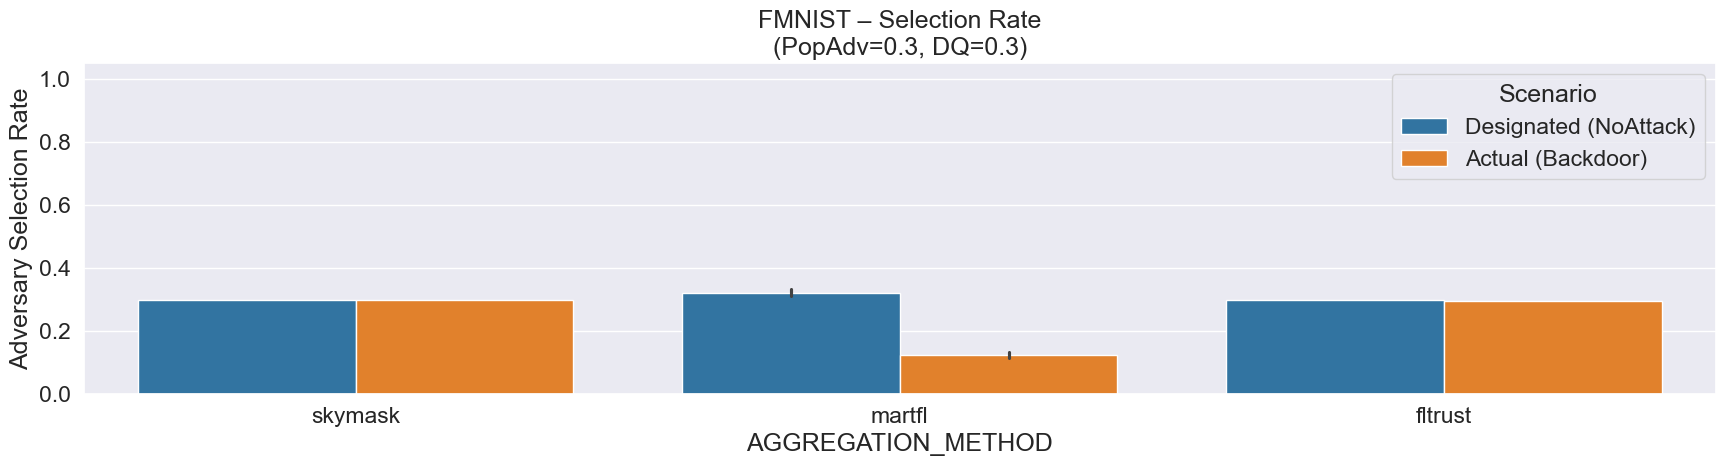

saved results\paper_figures\label_flipping_robustness_csv\sel_FMNIST_Backdoor.pdf
[skip] AG_NEWS: missing rows for attack=Backdoor
[skip] TREC: missing rows for attack=Backdoor


In [3]:
for ds in df["DATASET"].unique():
    for atk in ["Backdoor"]:     # add "Backdoor" if needed
        make_barplots(df, ds, atk)

In [13]:
import pandas as pd
# import seaborn as sns # Not needed for table generation
# import matplotlib.pyplot as plt # Not needed for table generation
from pathlib import Path
# import io # Not strictly needed if writing directly

# ---------------------------------------------------------------------
# CONFIG – tweak as needed or turn them into CLI args
# ---------------------------------------------------------------------
CSV_PATH              = Path("../result_new/summary_avg.csv")   # your upload
FIXED_POP_ADV_RATE    = 0.3       # pair on this population rate
DISCOVERY_QUALITY     = 0.3
BUYER_MODE            = "unbiased"
SAVE_DIR              = Path("./results/paper_tables/selection_rates") # New save directory for tables
SAVE_DIR.mkdir(parents=True, exist_ok=True)
# ---------------------------------------------------------------------

ATTACK_LABELS = {
    "label_flip":  "LabelFlipping",
    "backdoor":    "Backdoor",
    None:          "NoAttack",
    "":            "NoAttack"
}

def load_and_tag(csv_path: Path) -> pd.DataFrame:
    """Loads the CSV, tags rows with EFFECTIVE_ATTACK, and derives ADV_RATE_population."""
    df = pd.read_csv(csv_path)

    # Tag rows with an EFFECTIVE_ATTACK column
    df["EFFECTIVE_ATTACK"] = (
        df["attack_objective"]
        .map(lambda x: ATTACK_LABELS.get(str(x).strip().lower(), "UnknownAttack"))
    )

    # Derive No‑Attack rows when adv rate is 0
    df.loc[df["ADV_RATE"].eq(0), "EFFECTIVE_ATTACK"] = "NoAttack"

    # Keep separate columns for clarity
    df = df.rename(columns={"ADV_RATE": "ADV_RATE_effective"})
    df["ADV_RATE_population"] = df["ADV_RATE_effective"].where(
        df["EFFECTIVE_ATTACK"] != "NoAttack", FIXED_POP_ADV_RATE
    )
    return df

def generate_selection_rate_table(df: pd.DataFrame, dataset: str, attack: str, fixed_pop_adv_rate: float, save_dir: Path) -> None:
    """
    Generates a LaTeX table comparing baseline and attack selection rates
    for a given dataset and attack scenario, broken down by aggregation method.
    Saves the table code to a .tex file.
    """
    print(f"Generating table for {dataset} - {attack}...")

    base = df.query(
        "DATASET == @dataset and "
        "discovery_quality == @DISCOVERY_QUALITY and "
        "buyer_data_mode == @BUYER_MODE and "
        "ADV_RATE_population == @fixed_pop_adv_rate" # Use the passed argument
    )

    df_attack  = base.query("EFFECTIVE_ATTACK == @attack").copy()
    df_no_atk  = base.query("EFFECTIVE_ATTACK == 'NoAttack'").copy()
    print(df_attack)
    print(df_no_atk)
    if df_attack.empty or df_no_atk.empty:
        print(f"[skip] {dataset}: missing rows for attack={attack} or NoAttack baseline")
        return

    # Merge the baseline and attack data on AGGREGATION_METHOD
    # This is the same merge used for the bar plots
    paired = pd.merge(
        df_attack[["AGGREGATION_METHOD", "AVG_ADVERSARY_SELECTION_RATE"]],
        df_no_atk[["AGGREGATION_METHOD", f"NO_ATTACK_DESIG_MAL_SEL_RATE_{fixed_pop_adv_rate:.1f}"]],
        on="AGGREGATION_METHOD",
        suffixes=("_attack", "_baseline")
    )

    if paired.empty:
        print(f"[skip] {dataset}: No matching aggregation methods found for pairing.")
        return

    # Rename columns for clarity in the table generation loop
    baseline_col_name_raw = f"NO_ATTACK_DESIG_MAL_SEL_RATE_{fixed_pop_adv_rate:.1f}"
    paired = paired.rename(columns={
        baseline_col_name_raw: "Baseline Selection Rate",
        "AVG_ADVERSARY_SELECTION_RATE": "Attack Selection Rate" # The suffix is added by merge
    })

    print(paired)

    # --- Generate LaTeX Table String ---
    latex_string = ""

    # Add preamble (optional, but good if you want to compile this file directly)
    latex_string += "\\documentclass{article}\n"
    latex_string += "\\usepackage{booktabs}\n" # For nice table lines
    latex_string += "\\usepackage{caption}\n" # For table caption
    latex_string += "\\usepackage{geometry}\n" # Optional: adjust margins
    latex_string += "\\geometry{a4paper, margin=1in}\n"
    latex_string += "\\begin{document}\n\n"

    # Add explanation before the table
    latex_string += "\\section*{Seller Selection Percentage Analysis}\n\n"
    latex_string += "This table presents the percentage of total selections received by the malicious seller(s) under a specific attack scenario compared to a controlled baseline. The results are broken down by the aggregation method used by the system.\n\n"
    latex_string += "\\begin{itemize}\n"
    latex_string += "  \\item \\textbf{Controlled Baseline (No Attack):} The selection percentage for a specific non-malicious seller under controlled data distribution conditions. This serves as a reference point showing expected selection without attack.\n"
    latex_string += f"  \\item \\textbf{{Attack Scenario ({attack}):}} The total selection percentage received by the malicious seller(s) when performing the {attack} strategy.\n"
    latex_string += "\\end{itemize}\n\n"


    # Start the table environment
    latex_string += "\\begin{table}[htbp]\n"
    latex_string += "  \\centering\n"
    latex_string += f"  \\caption{{Seller Selection Percentage for {dataset} under {attack} Attack (PopAdv={fixed_pop_adv_rate}, DQ={DISCOVERY_QUALITY})}}\n"
    latex_string += "  \\label{tab:selection_percentage_" # Add dataset/attack to label for uniqueness
    latex_string += f"{dataset.replace(' ', '_').replace('-', '_').lower()}_"
    latex_string += f"{attack.replace(' ', '_').replace('-', '_').lower()}\n"

    # Define column format: l (left-aligned) for method, cc (centered) for percentages
    latex_string += "  \\begin{tabular}{lrr}\n" # l c c
    latex_string += "    \\toprule\n"

    # Add table headers
    # Using \multicolumn to span for the percentage unit
    latex_string += "    Aggregation Method & \\multicolumn{2}{c}{Percentage of Total Selections (\\%)}\\\\\n"
    latex_string += "    \\cmidrule(lr){2-3} % rule spanning columns 2 and 3"
    latex_string += "     & Controlled Baseline (No Attack) & " + f"{attack}" + "\\\\\n"
    latex_string += "    \\midrule\n"

    # Add table rows from the paired DataFrame
    # Iterate through rows, format data
    for index, row in paired.iterrows():
        method = row["AGGREGATION_METHOD"]
        baseline_perc = row["Baseline Selection Rate"] * 100 # Convert to percentage
        attack_perc = row["Attack Selection Rate"] * 100     # Convert to percentage

        # Format row string
        latex_string += f"    {method} & {baseline_perc:.2f} & {attack_perc:.2f} \\\\\n"

    # End table body and add bottom rule
    latex_string += "    \\bottomrule\n"
    latex_string += "  \\end{tabular}\n"
    latex_string += "\\end{table}\n\n"

    # End document
    latex_string += "\\end{document}\n"

    # --- Save the LaTeX string to a file ---
    # Create a safe filename
    filename = f"selection_table_{dataset.replace(' ', '_').replace('-', '_').lower()}_{attack.replace(' ', '_').replace('-', '_').lower()}.tex"
    file_path = save_dir / filename

    try:
        with open(file_path, "w") as f:
            f.write(latex_string)
        print(f"Successfully saved table to {file_path}")
    except IOError as e:
        print(f"Error saving table to {file_path}: {e}")


# ---------------------------------------------------------------------
if __name__ == "__main__":
    df = load_and_tag(CSV_PATH)

    # --- Generate Tables ---
    for ds in df["DATASET"].unique():
        # You can iterate through multiple attacks here if needed
        for atk in ["Backdoor", "Label_flip"]: # Add "Backdoor" or other attack names from ATTACK_LABELS
             # Note: The make_barplots function is removed, as requested,
             # or you would call it here if you still wanted the plots.
             # make_barplots(df, ds, atk) # REMOVED
             generate_selection_rate_table(df, ds, atk, FIXED_POP_ADV_RATE, SAVE_DIR)

Generating table for CIFAR - Backdoor...
      TOTAL_COST  ROUNDS_TO_80ACC CHANGE_BASE  COST_TO_70ACC buyer_data_mode  \
75   2000.000000              NaN       False            NaN        unbiased   
79    803.666667              NaN       False            NaN        unbiased   
80   2000.000000              NaN       False            NaN        unbiased   
84   1130.000000              NaN       False            NaN        unbiased   
94   2000.000000              NaN       False            NaN        unbiased   
97    208.000000              NaN       False            NaN        unbiased   
100  1314.333333              NaN       False            NaN        unbiased   

     AVG_COST_PER_ROUND  AVG_SELECTED_DISTRIBUTION_SIMILARITY ATTACK_METHOD  \
75            10.000000                                   0.0        single   
79             4.018333                                   0.0        single   
80            10.000000                                   0.0        single   
84

In [14]:
df

,TOTAL_COST,ROUNDS_TO_80ACC,CHANGE_BASE,COST_TO_70ACC,buyer_data_mode,AVG_COST_PER_ROUND,AVG_SELECTED_DISTRIBUTION_SIMILARITY,ATTACK_METHOD,AVG_BENIGN_SELECTION_RATE,COST_OF_CONVERGENCE,...,FINAL_TRIGGERED_ACC,N_CLIENTS,IS_SYBIL,ROUNDS_TO_75ACC,FINAL_ASR,DATA_SPLIT_MODE,MAX_ASR,exp_path,EFFECTIVE_ATTACK,ADV_RATE_population
0,2000.000000,NaN,False,NaN,unbiased,10.000000,0.0,NaN,1.000000,NaN,...,NaN,10,False,NaN,NaN,discovery,0.0000,./experiment_results_revised/privacy/gradient_...,NoAttack,0.3
1,2000.000000,18.0,False,60.0,unbiased,10.000000,0.0,NaN,1.000000,180.0,...,NaN,10,False,10.5,NaN,discovery,0.0000,./experiment_results_revised/privacy/gradient_...,NoAttack,0.3
2,700.000000,NaN,False,NaN,unbiased,7.000000,0.0,single,1.000000,NaN,...,NaN,10,False,NaN,NaN,discovery,0.0000,./experiment_results_revised/label_flip_attack...,LabelFlipping,0.3
3,NaN,NaN,NaN,NaN,unbiased,NaN,NaN,single,NaN,NaN,...,NaN,10,False,NaN,NaN,discovery,NaN,./experiment_results_revised/label_flip_attack...,LabelFlipping,0.3
4,NaN,NaN,NaN,NaN,unbiased,NaN,NaN,single,NaN,NaN,...,NaN,10,False,NaN,NaN,discovery,NaN,./experiment_results_revised/label_flip_attack...,LabelFlipping,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaN,NaN,NaN,unbiased,NaN,NaN,single,NaN,NaN,...,NaN,10,False,NaN,NaN,discovery,NaN,./experiment_results_revised/attack_comparison...,Backdoor,0.3
99,NaN,NaN,NaN,NaN,unbiased,NaN,NaN,single,NaN,NaN,...,NaN,10,False,NaN,NaN,discovery,NaN,./experiment_results_revised/attack_comparison...,Backdoor,0.3
100,1314.333333,NaN,False,NaN,unbiased,6.571667,0.0,single,0.710917,NaN,...,NaN,10,False,NaN,0.438033,discovery,0.7107,./experiment_results_revised/attack_comparison...,Backdoor,0.3
101,NaN,NaN,NaN,NaN,unbiased,NaN,NaN,single,NaN,NaN,...,NaN,10,False,NaN,NaN,discovery,NaN,./experiment_results_revised/attack_comparison...,Backdoor,0.3


In [ ]:
df